## Under-sampling

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# โหลดข้อมูลที่ clean แล้ว
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Stroke Prediction/healthcare-dataset-stroke-data-cleaned.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


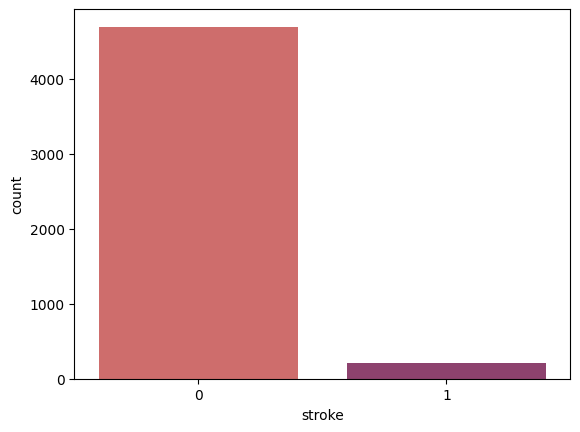

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.countplot(x=df['stroke'], data=df, palette="flare")

In [15]:
from imblearn.under_sampling import RandomUnderSampler

# แยก features และ target variable
X = df.drop('stroke', axis=1)
y = df['stroke']

# สร้าง object ของ RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# ใช้ method fit_resample เพื่อทำ under-sampling
X_resampled, y_resampled = rus.fit_resample(X, y)

In [16]:
# แสดงข้อมูลคลาสก่อนและหลัง under-sampling ในรูปแบบ DataFrame
print("Before under-sampling:")
print(pd.DataFrame(y.value_counts()))

print("\nAfter under-sampling:")
print(pd.DataFrame(y_resampled.value_counts()))

Before under-sampling:
   stroke
0    4699
1     209

After under-sampling:
   stroke
0     209
1     209


In [17]:
# รวม X_resampled และ y_resampled ด้วยกัน
df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['stroke'])], axis=1)
df_resampled

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,49.0,0,0,Yes,Private,Urban,219.70,53.8,Unknown,0
1,Female,81.0,0,0,Yes,Self-employed,Rural,114.88,18.3,formerly smoked,0
2,Male,7.0,0,0,No,children,Rural,88.39,19.7,Unknown,0
3,Female,79.0,0,0,No,Self-employed,Rural,71.98,36.4,never smoked,0
4,Female,39.0,0,0,Yes,Private,Urban,87.39,57.9,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
413,Female,68.0,1,1,Yes,Private,Urban,247.51,40.5,formerly smoked,1
414,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
415,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
416,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1


In [22]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             418 non-null    object 
 1   age                418 non-null    float64
 2   hypertension       418 non-null    int64  
 3   heart_disease      418 non-null    int64  
 4   ever_married       418 non-null    object 
 5   work_type          418 non-null    object 
 6   Residence_type     418 non-null    object 
 7   avg_glucose_level  418 non-null    float64
 8   bmi                418 non-null    float64
 9   smoking_status     418 non-null    object 
 10  stroke             418 non-null    int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 36.0+ KB


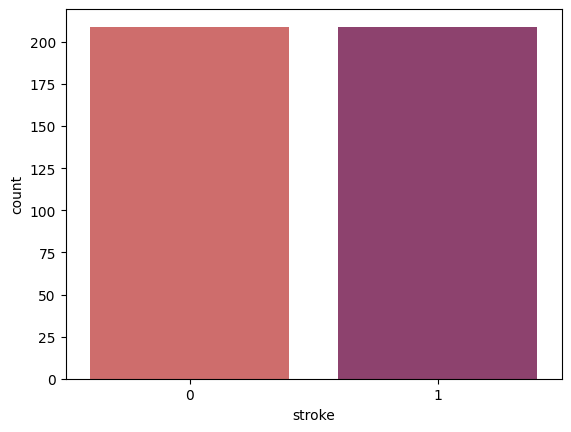

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.countplot(x=df_resampled['stroke'], data=df_resampled, palette="flare")

In [23]:
df_resampled.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,54.634833,0.184211,0.126794,119.752153,29.589713,0.500000
std,22.762976,0.388120,0.333141,57.486810,7.529250,0.500599
min,0.480000,0.000000,0.000000,55.510000,12.800000,0.000000
25%,41.000000,0.000000,0.000000,77.482500,24.300000,0.000000
50%,59.000000,0.000000,0.000000,96.265000,28.800000,0.500000
75%,74.000000,0.000000,0.000000,160.480000,33.600000,1.000000
max,82.000000,1.000000,1.000000,271.740000,57.900000,1.000000


In [24]:
# ตรวจสอบ na ในข้อมูล
df_resampled.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [97]:
df_resampled.to_csv('healthcare-dataset-stroke-data-cleaned-Under-sampling.csv', index=False)

# Modeling

In [25]:
# เปลี่ยน data type ของ column
df_resampled['hypertension'] = df_resampled['hypertension'].astype(str)
df_resampled['heart_disease'] = df_resampled['heart_disease'].astype(str)
df_resampled['stroke'] = df_resampled['stroke'].astype(str)

In [26]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             418 non-null    object 
 1   age                418 non-null    float64
 2   hypertension       418 non-null    object 
 3   heart_disease      418 non-null    object 
 4   ever_married       418 non-null    object 
 5   work_type          418 non-null    object 
 6   Residence_type     418 non-null    object 
 7   avg_glucose_level  418 non-null    float64
 8   bmi                418 non-null    float64
 9   smoking_status     418 non-null    object 
 10  stroke             418 non-null    object 
dtypes: float64(3), object(8)
memory usage: 36.0+ KB


In [27]:
df_cat  = pd.get_dummies(df_resampled.select_dtypes('object') , drop_first=True)
df_cat

,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
0,1,0,0,1,0,1,0,0,1,0,0,0,0
1,0,0,0,1,0,0,1,0,0,1,0,0,0
2,1,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,1,0,0
4,0,0,0,1,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,1,1,1,0,1,0,0,1,1,0,0,1
414,1,0,0,1,0,1,0,0,0,0,0,0,1
415,0,0,0,0,0,0,0,1,0,0,0,0,1
416,0,0,0,1,0,0,1,0,0,1,0,0,1


In [28]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   gender_Male                     418 non-null    uint8
 1   hypertension_1                  418 non-null    uint8
 2   heart_disease_1                 418 non-null    uint8
 3   ever_married_Yes                418 non-null    uint8
 4   work_type_Never_worked          418 non-null    uint8
 5   work_type_Private               418 non-null    uint8
 6   work_type_Self-employed         418 non-null    uint8
 7   work_type_children              418 non-null    uint8
 8   Residence_type_Urban            418 non-null    uint8
 9   smoking_status_formerly smoked  418 non-null    uint8
 10  smoking_status_never smoked     418 non-null    uint8
 11  smoking_status_smokes           418 non-null    uint8
 12  stroke_1                        418 non-null    uint8
dtypes: ui

In [29]:
df_num = df_resampled.select_dtypes('number')
df_num

,age,avg_glucose_level,bmi
0,49.0,219.70,53.8
1,81.0,114.88,18.3
2,7.0,88.39,19.7
3,79.0,71.98,36.4
4,39.0,87.39,57.9
...,...,...,...
413,68.0,247.51,40.5
414,57.0,84.96,36.7
415,14.0,57.93,30.9
416,75.0,78.80,29.3


In [30]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                418 non-null    float64
 1   avg_glucose_level  418 non-null    float64
 2   bmi                418 non-null    float64
dtypes: float64(3)
memory usage: 9.9 KB


In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
df_num_scaler = StandardScaler().fit_transform(df_num)
df_num_scaler

array([[-0.24784039,  1.74070567,  3.21935102],
       [ 1.15963578, -0.0848541 , -1.50124403],
       [-2.09515287, -0.54620764, -1.31507971],
       ...,
       [-1.78726746, -1.07670326,  0.17423478],
       [ 0.895734  , -0.71322842, -0.03852443],
       [ 1.02768489, -0.71305426, -1.32837716]])

In [33]:
df_num_scaler_final = pd.DataFrame(df_num_scaler, columns=df_num.columns, index=df_num.index)
df_num_scaler_final

,age,avg_glucose_level,bmi
0,-0.247840,1.740706,3.219351
1,1.159636,-0.084854,-1.501244
2,-2.095153,-0.546208,-1.315080
3,1.071669,-0.832006,0.905595
4,-0.687677,-0.563624,3.764547
...,...,...,...
413,0.587849,2.225049,1.450790
414,0.104029,-0.605945,0.945487
415,-1.787267,-1.076703,0.174235
416,0.895734,-0.713228,-0.038524


In [34]:
df_final = pd.concat([df_num_scaler_final, df_cat],axis=1) # axis=1 จะเป็นการต่อในแนวนอน
df_final

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
0,-0.247840,1.740706,3.219351,1,0,0,1,0,1,0,0,1,0,0,0,0
1,1.159636,-0.084854,-1.501244,0,0,0,1,0,0,1,0,0,1,0,0,0
2,-2.095153,-0.546208,-1.315080,1,0,0,0,0,0,0,1,0,0,0,0,0
3,1.071669,-0.832006,0.905595,0,0,0,0,0,0,1,0,0,0,1,0,0
4,-0.687677,-0.563624,3.764547,0,0,0,1,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.587849,2.225049,1.450790,0,1,1,1,0,1,0,0,1,1,0,0,1
414,0.104029,-0.605945,0.945487,1,0,0,1,0,1,0,0,0,0,0,0,1
415,-1.787267,-1.076703,0.174235,0,0,0,0,0,0,0,1,0,0,0,0,1
416,0.895734,-0.713228,-0.038524,0,0,0,1,0,0,1,0,0,1,0,0,1


In [35]:
y = df_final['stroke_1']
X = df_final.drop('stroke_1', axis=1)

In [36]:
y

0      0
1      0
2      0
3      0
4      0
      ..
413    1
414    1
415    1
416    1
417    1
Name: stroke_1, Length: 418, dtype: uint8

In [37]:
X

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,-0.247840,1.740706,3.219351,1,0,0,1,0,1,0,0,1,0,0,0
1,1.159636,-0.084854,-1.501244,0,0,0,1,0,0,1,0,0,1,0,0
2,-2.095153,-0.546208,-1.315080,1,0,0,0,0,0,0,1,0,0,0,0
3,1.071669,-0.832006,0.905595,0,0,0,0,0,0,1,0,0,0,1,0
4,-0.687677,-0.563624,3.764547,0,0,0,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.587849,2.225049,1.450790,0,1,1,1,0,1,0,0,1,1,0,0
414,0.104029,-0.605945,0.945487,1,0,0,1,0,1,0,0,0,0,0,0
415,-1.787267,-1.076703,0.174235,0,0,0,0,0,0,0,1,0,0,0,0
416,0.895734,-0.713228,-0.038524,0,0,0,1,0,0,1,0,0,1,0,0


In [53]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state=12
)

In [69]:
X_train

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
319,0.631832,1.101359,0.918892,1,1,0,0,0,1,0,0,0,0,1,0
86,0.060045,-0.096523,-1.102321,0,0,0,1,0,1,0,0,0,0,1,0
71,-1.611333,-0.377097,-1.035833,0,0,0,0,0,1,0,0,0,0,1,0
234,-0.555726,-0.632940,-0.557125,1,0,0,1,0,1,0,0,0,0,0,0
257,0.060045,1.139326,1.437493,0,0,0,1,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,0.148012,-0.472537,0.320507,1,0,0,0,0,1,0,0,0,0,0,0
253,0.367930,1.340309,0.918892,1,0,1,1,0,1,0,0,0,1,0,0
390,0.807767,1.741228,-0.131607,1,0,1,1,0,0,0,0,0,0,1,0
155,0.323947,1.597719,1.530575,1,1,0,1,0,1,0,0,1,0,0,0


In [70]:
y_train.value_counts()

0    169
1    165
Name: stroke_1, dtype: int64

In [71]:
X_test

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
289,0.148012,2.104529,0.240722,1,0,1,1,0,1,0,0,0,0,0,1
258,1.115652,-0.781151,-0.982643,0,1,0,1,0,1,0,0,0,0,1,0
392,1.071669,-0.818944,-0.158201,1,0,0,1,0,1,0,0,0,0,1,0
6,0.851750,2.303073,-0.543828,0,0,0,1,0,0,0,0,1,0,1,0
296,0.104029,-0.160788,-0.144904,0,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,0.939718,1.107455,1.317816,0,0,0,1,0,1,0,0,1,1,0,0
350,0.235980,-0.388766,-0.424151,0,0,0,1,0,1,0,0,1,0,0,1
283,1.159636,-0.817551,-0.437448,1,0,0,1,0,1,0,0,1,0,1,0
325,0.895734,1.383675,-0.397556,0,0,0,1,0,1,0,0,0,0,0,0


In [72]:
y_test.value_counts()

1    44
0    40
Name: stroke_1, dtype: int64

## Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [74]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
precision_score, recall_score, classification_report

In [76]:
y_pred = clf.predict(X_test)

In [77]:
accuracy_score(y_test, y_pred)

0.6547619047619048

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.62      0.63        40
           1       0.67      0.68      0.67        44

    accuracy                           0.65        84
   macro avg       0.65      0.65      0.65        84
weighted avg       0.65      0.65      0.65        84



In [79]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

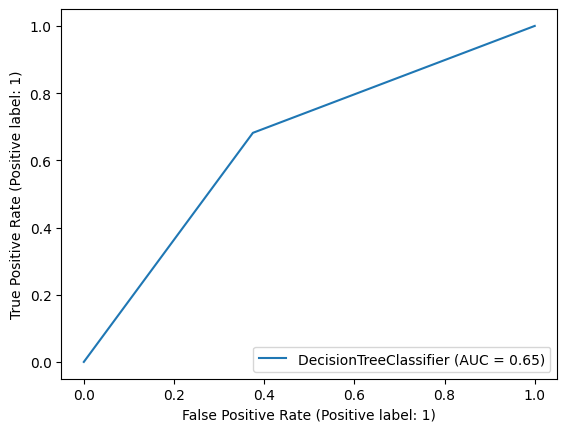

In [80]:
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()

In [81]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

0.6534090909090908

## Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [83]:
scores = []
for n in range(50, 101):
  rf = RandomForestClassifier(n_estimators=n, random_state=555)
  scores.append(cross_val_score(rf, X, y, cv=5).mean())
max_score = max(scores)
max_index = scores.index(max_score)+50
print(max_index, max_score)

100 0.7558519793459553


In [84]:
rf = RandomForestClassifier(n_estimators=100 , random_state=555)

In [85]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=555)

In [86]:
rf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=935590298),
 DecisionTreeClassifier(max_features='sqrt', random_state=1299452590),
 DecisionTreeClassifier(max_features='sqrt', random_state=205536233),
 DecisionTreeClassifier(max_features='sqrt', random_state=707945505),
 DecisionTreeClassifier(max_features='sqrt', random_state=1908992580),
 DecisionTreeClassifier(max_features='sqrt', random_state=2114428285),
 DecisionTreeClassifier(max_features='sqrt', random_state=800496166),
 DecisionTreeClassifier(max_features='sqrt', random_state=2027234710),
 DecisionTreeClassifier(max_features='sqrt', random_state=348782825),
 DecisionTreeClassifier(max_features='sqrt', random_state=1684888573),
 DecisionTreeClassifier(max_features='sqrt', random_state=612799984),
 DecisionTreeClassifier(max_features='sqrt', random_state=762371381),
 DecisionTreeClassifier(max_features='sqrt', random_state=1915208288),
 DecisionTreeClassifier(max_features='sqrt', random_state=1459143764),
 DecisionTree

In [87]:
predictions = rf.predict(X_test)
predictions

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1], dtype=uint8)

In [88]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
precision_score, recall_score, classification_report

In [89]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.57      0.64        40
           1       0.67      0.80      0.73        44

    accuracy                           0.69        84
   macro avg       0.70      0.69      0.68        84
weighted avg       0.69      0.69      0.69        84



In [90]:
importances = rf.feature_importances_
importances

array([0.35785618, 0.18875485, 0.17529855, 0.02831368, 0.05113533,
       0.02237499, 0.03118934, 0.0004391 , 0.02156686, 0.02317349,
       0.01789311, 0.02205134, 0.01998304, 0.02408225, 0.01588787])

In [91]:
Variable_importance = pd.DataFrame(dict(Feature=X.columns,
                  Value=rf.feature_importances_))\
  .sort_values(by='Value', ascending=False)

In [92]:
Variable_importance

,Feature,Value
0,age,0.357856
1,avg_glucose_level,0.188755
2,bmi,0.175299
4,hypertension_1,0.051135
6,ever_married_Yes,0.031189
3,gender_Male,0.028314
13,smoking_status_never smoked,0.024082
9,work_type_Self-employed,0.023173
5,heart_disease_1,0.022375
11,Residence_type_Urban,0.022051


In [93]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

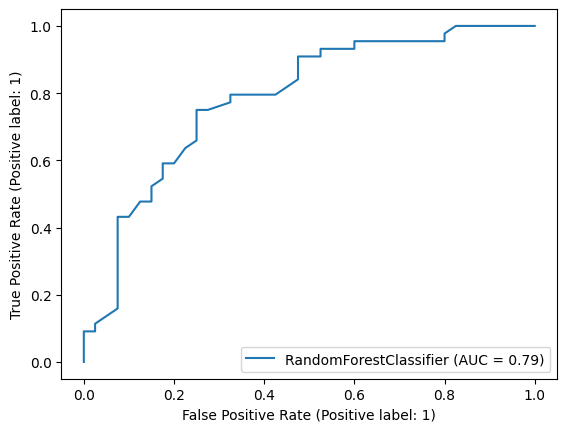

In [94]:
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.show()

In [95]:
roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])

0.7860795454545455



---

